## Hour 2:  Computer Vision ImageOps

In [1]:
#! pip install opencv-python
# LinK : https://pypi.org/project/opencv-python/
import cv2
print('opencv:',cv2.__version__)

#! pip install numpy 
#! pip install matplotlib
#! pip install pandas

import numpy as np
print('numpy:',np.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib:',matplotlib.__version__)

import pandas as pd
print('pandas:',pd.__version__)

opencv: 4.3.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5


Topics to be discussed :

1.	Edge Detection
2.	Colour Masking
3.	Template Matching
4.	Shape Detection
5.	Image Sampling and Reconstruction

### 1. Edge Detection

Edge detection is one of the initial problems that was solved quite efficiently in the computer vision domain. For describing an object of interest, edges are the primary features that are described first. 

**What are edges?**

Visually edges are interpreted as sharp contrasts between two regions. Mathematically, contrast, or change, in a function is modeled by its derivative. So, all edge detection operators compute the gradient of the pixel values.

In this section, we will experience three different and popular edge detection filters:
1. Sobel Filter
2. Laplacian Filter
3. Canny Filter

(256, 256)


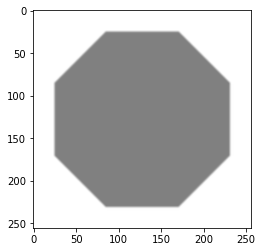

In [2]:
# Utility function to display images
def show_image(img, fig_size = None):
    print(img.shape)
    img = img.astype('uint8')
    
    if fig_size is not None:
        plt.figure(figsize=fig_size)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
image = cv2.imread('dataset/octagon.png',0)
show_image(image)

(256, 256)


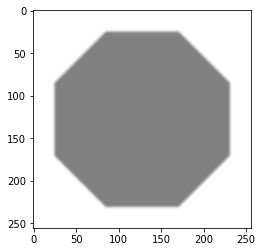

In [3]:
# remove noise
blurred = cv2.GaussianBlur(image,(5,5),0)

# Q: Why did we blur?
show_image(blurred)

(256, 256)


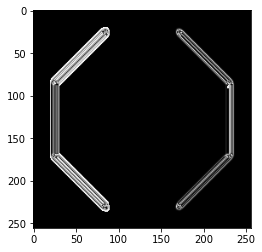

(256, 256)


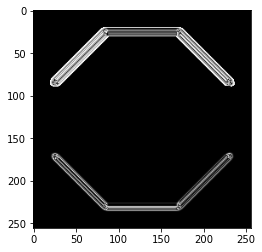

(256, 256)


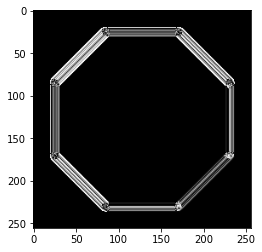

In [4]:
# Sobel Filters
sobelx = cv2.Sobel(blurred,cv2.CV_64F,1,0,ksize=5)  # x - vertical edges
show_image(sobelx)

sobely = cv2.Sobel(blurred,cv2.CV_64F,0,1,ksize=5)  # y - horizontal edge
show_image(sobely)

show_image(cv2.bitwise_or(sobelx, sobely))

(256, 256)


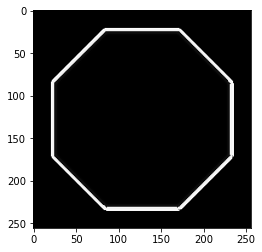

In [5]:
# Laplacian Filter 
laplacian = cv2.Laplacian(blurred,cv2.CV_64F)
show_image(laplacian)

(256, 256)


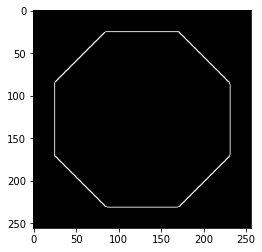

In [6]:
# Canny Filter 
canny = cv2.Canny(blurred,60,20)
show_image(canny)

### 2. Colour Masking

How do we localize objects of a specific colour and only highlight the detected objects with a specific coloured mask?

(258, 320, 3)


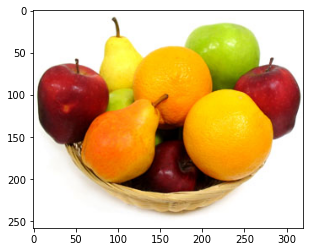

(258, 320, 3)


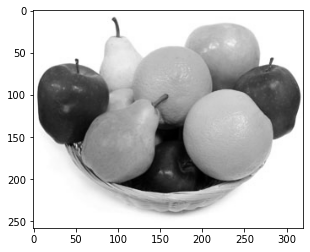

In [7]:
fruit_image = cv2.imread('dataset/fruit.png')
gray_fruit = cv2.imread('dataset/gray_fruit.png')
show_image(fruit_image)
show_image(gray_fruit)

(258, 320)


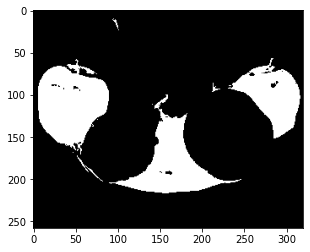

(258, 320, 3)


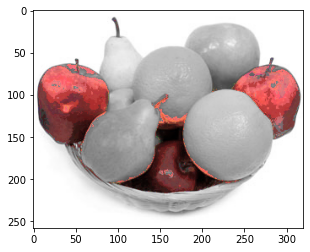

In [8]:
def apply_colored_mask(img1, img2):
    duplicate = img1.copy()
    lowerRange = np.array([0,0,0]) # Colour mask to identify red colour
    upperRange = np.array([100,80,255]) # Colour mask to identify red colour
    mask = cv2.inRange(duplicate, lowerRange, upperRange)
    show_image(mask)
    result = cv2.bitwise_or(duplicate,duplicate, mask= mask)
    masked_image = cv2.bitwise_or(img2, result)
    show_image(masked_image)
    
apply_colored_mask(fruit_image, gray_fruit)

### 3. Template Matching

Template matching is based on the principle of Normalized Correlation, used for pattern matching and localization of a specific object of interest within the main image.

In [9]:
import scipy.signal as sp

# Find template 2D
def find_template_2D(template, img):
    c = sp.correlate2d(img, template, mode='same')

    # These y, x coordinates represent the peak. This point needs to be
    # translated to be the top-left corner as the quiz suggests
    y, x = np.unravel_index(np.argmax(c), c.shape)
    return y - template.shape[0] // 2, x - template.shape[1] // 2

(345, 360)


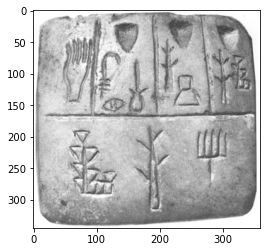

(91, 35)


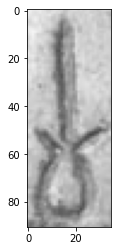

In [10]:
tablet = cv2.imread('dataset/tablet.png', 0)
show_image(tablet)

glyph = tablet[74:165, 149:184]
show_image(glyph)

(345, 360, 3)


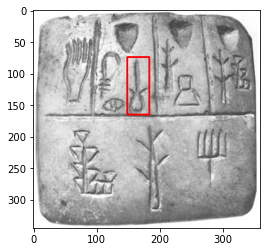

In [11]:
tablet_2 = 1. * tablet - np.mean(tablet)
glyph_2 = 1. * glyph - np.mean(glyph)

y, x = find_template_2D(glyph_2, tablet_2)

tablet_copy = cv2.cvtColor(tablet, code=cv2.COLOR_GRAY2BGR)
cv2.rectangle(tablet_copy, (x, y), (x + glyph.shape[1], y + glyph.shape[0]), (0, 0, 255), thickness=2)
show_image(tablet_copy)

### 4. Shape Detection

In this section we will see how to leverage CV algorithms and techniques to detect the following basic geometrical shapes:
1. Lines
2. Circle
3. Square
4. Rectangle
5. Triangle

In [12]:
### Straight Line Detection using Hough Line Transform Algorithm

(865, 1536, 3)


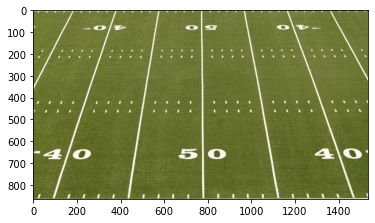

In [13]:
houghLineImage = cv2.imread('dataset/houghLines.png')
show_image(houghLineImage)

(865, 1536, 3)


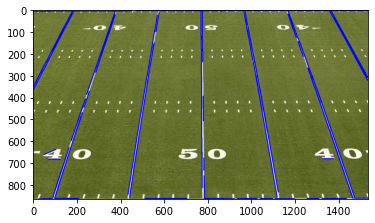

In [14]:
def line_detector(input_img):
    img = input_img.copy()
    blurred = cv2.GaussianBlur(img,(5,5),0)
    edges = cv2.Canny(blurred,50,150)
    lines = cv2.HoughLinesP(edges,rho = 1, theta = (np.pi/180), threshold = 15, minLineLength = 50, maxLineGap = 10)
    if(lines is not None):
        for i in range(len(lines)):
            x1,y1,x2,y2 = lines[i][0]
            cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)

        show_image(img)
    else:
        print('No straight line is detected')
    
line_detector(houghLineImage)

In [15]:
### Cirlce Detection using Hough Circle Transform Algorithm

(805, 803, 3)


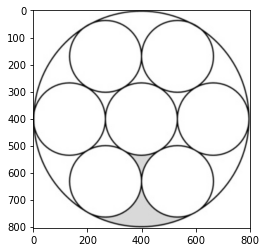

In [16]:
houghCircleImage = cv2.imread('dataset/houghCircles.png')
show_image(houghCircleImage)

In [17]:
def circle_detector(input_img, minDist=50, minRadius=100,maxRadius=150):
    img = input_img.copy()
    blurred = cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),5)
    circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,minDist=minDist,param1=50,param2=30,minRadius=minRadius,maxRadius=maxRadius)

    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),5)
        # draw the center of the circle
        cv2.circle(img,(i[0],i[1]),2,(0,0,255),10)
    
    return img

# create windows and trackbar

# empty callback function for creating trackar
def callback(foo):
    pass


cv2.namedWindow('Hough Parameter Tuning')
cv2.createTrackbar('minDist', 'Hough Parameter Tuning', 50, 100, callback)
cv2.createTrackbar('minRadius', 'Hough Parameter Tuning', 50, 200, callback)
cv2.createTrackbar('maxRadius', 'Hough Parameter Tuning', 100,500, callback)


while(True):
    #get threshold value from trackbar
    minDist = cv2.getTrackbarPos('minDist', 'Hough Parameter Tuning')
    minRadius = cv2.getTrackbarPos('minRadius', 'Hough Parameter Tuning')
    maxRadius = cv2.getTrackbarPos('maxRadius', 'Hough Parameter Tuning')

    img = circle_detector(houghCircleImage, minDist,minRadius,maxRadius)
    
    cv2.imshow('Hough Parameter Tuning',img)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv2.waitKey(0)    
cv2.destroyAllWindows()

In [18]:
# Square Detection

(385, 512, 3)


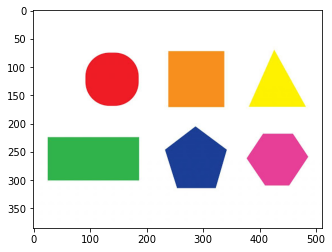

In [19]:
shapesImage = cv2.imread('dataset/square.png')
show_image(shapesImage)

Square Detected
(385, 512, 3)


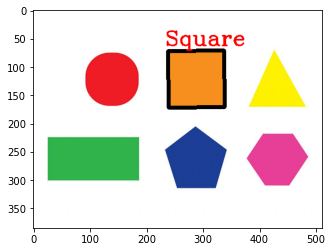

In [20]:
def square_detector(img):
    img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,threshold = cv2.threshold(gray, 230, 255,cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.009*cv2.arcLength(cnt, True), True)

        x = approx.ravel()[0]
        y = approx.ravel()[1]
        
        if len(approx) == 4:
            area = cv2.contourArea(cnt)
            if(area < (0.8 * img.shape[0] * img.shape[1])):
                
                (x1, y1, w1, h1) = cv2.boundingRect(approx)
                
                ar = w1 / float(h1)
                # a square will have an aspect ratio that is approximately
                # equal to one, otherwise, the shape is a rectangle
                if ar >= 0.95 and ar <= 1.05:
                    print('Square Detected')
                    cv2.drawContours(img, [approx], 0, (0), 5)
                    cv2.putText(img, "Square", (x-5, y-10), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0,0,255),2)
                    show_image(img)
        
            
square_detector(shapesImage)

Rectangle Detected
(385, 512, 3)


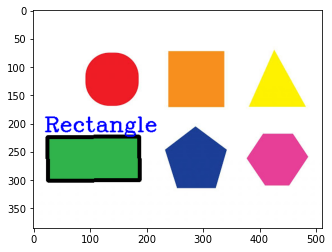

In [21]:
def rectangle_detector(img):
    img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,threshold = cv2.threshold(gray, 230, 255,cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.009*cv2.arcLength(cnt, True), True)

        x = approx.ravel()[0]
        y = approx.ravel()[1]
        
        if len(approx) == 4:
            area = cv2.contourArea(cnt)
            if(area < (0.8 * img.shape[0] * img.shape[1])):
                
                (x1, y1, w1, h1) = cv2.boundingRect(approx)
                
                ar = w1 / float(h1)
                # a rectangle will not have an aspect ratio of one
                if ar < 0.95 or ar > 1.05:
                    print('Rectangle Detected')
                    cv2.drawContours(img, [approx], 0, (0), 5)
                    cv2.putText(img, "Rectangle", (x-5, y-10), cv2.FONT_HERSHEY_COMPLEX, 1.2, (255,0,0),2)
                    show_image(img)
        
            
rectangle_detector(shapesImage)

Triangle Detected
(385, 512, 3)


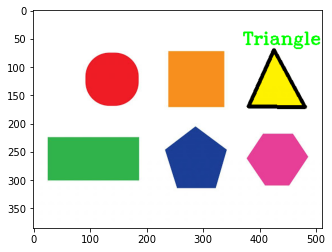

In [22]:
def triangle_detector(img):
    img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,threshold = cv2.threshold(gray, 230, 255,cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.009*cv2.arcLength(cnt, True), True)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        
        if len(approx) == 3:
                print('Triangle Detected')
                cv2.drawContours(img, [approx], 0, (0), 5)
                cv2.putText(img, "Triangle", (x-55, y-10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0),2)
                show_image(img)
        
            
triangle_detector(shapesImage)

### Challenge 2

Traffic Sign Detector from animated and real-world images.

**Note** - Sample data provided under Chalenge 2 folder

(240, 450, 3)


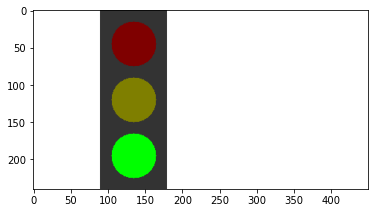

(309, 990, 3)


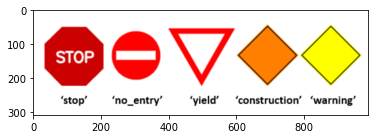

In [23]:
tl_1 = cv2.imread('dataset/simple_tl.png')
show_image(tl_1)
tl_2 = cv2.imread('dataset/traffic.PNG')
show_image(tl_2)